Running epoch # 0...
Running epoch # 1...
Running epoch # 2...
Running epoch # 3...
Running epoch # 4...
Running epoch # 5...
Running epoch # 6...
Running epoch # 7...
Running epoch # 8...
Running epoch # 9...
Running epoch # 10...
Running epoch # 20...
Finished running and solution found in epoch # 26! =D 

Saving animation...
Animation saves as gif at: random_search_play.gif
############################
#                          #
#        All done!!        #
#                          #
############################


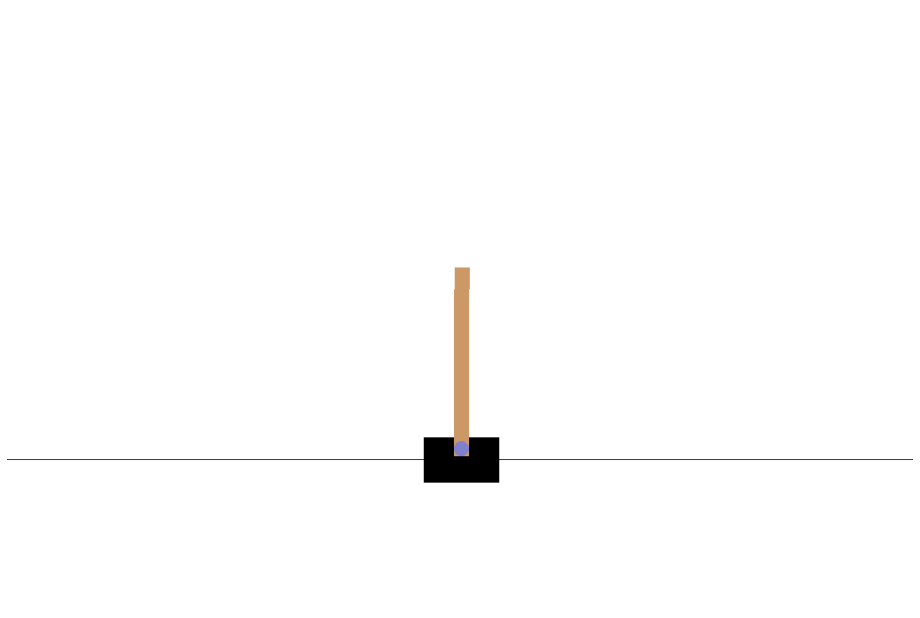

In [1]:
import gym
# from gym import wrappers
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display

# pop_up=False
# if (pop_up):
#     %matplotlib qt
# else:
#     %matplotlib notebook

# configurations
numEpoch=10000
numTargetFrame=400

    
env = gym.make('CartPole-v1')
# env = wrappers.Monitor(env, video_callable=False ,force=True)

def display_frames_as_gif(frames, filename_gif = None):
    """
    Displays a list of frames as a gif, with controls
    """
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 36)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50, repeat=False)
    if filename_gif: 
        print("Saving animation...")
        anim.save(filename_gif, writer = 'pillow', fps=10)
        print("Animation saves as gif at: {}".format(filename_gif))
    
def run_episode(env, parameters):  
    """Runs the env for a certain amount of steps with the given parameters. Returns the reward obtained"""
    observation = env.reset()
    totalreward = 0
    for _ in range(numTargetFrame):
        action = 0 if np.matmul(parameters,observation) < 0 else 1 # decides what action to take
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if done:
            break
    return totalreward

# Random search: try random parameters between -1 and 1, see how long the game lasts with those parameters
bestparams = None  
bestreward = 0
succeed = 0
for i in range(numEpoch):  
    parameters = np.random.rand(4) * 2 - 1
    reward = run_episode(env,parameters)
    if reward > bestreward:
        bestreward = reward
        bestparams = parameters
        # considered solved if the agent lasts for the required number of timesteps
        if reward == numTargetFrame:
            succeed = 1
            break
    if(i<10 or (i<100 and i%10==0) or (i<1000 and i%100==0) or (i%1000==0)):
        print("Running epoch # {}...".format(i))
if (succeed==1):
    print("Finished running and solution found in epoch # {}! =D \n".format(i)) # first epoch starts from label 0
else:
    print("Finished running but solution not found. =\\ \n")
            
def show_episode(env, parameters):  
    """ Records the frames of the environment obtained using the given parameters... Returns RGB frames"""
    observation = env.reset()
    firstframe = env.render(mode='rgb_array')
    frames = [firstframe]
    
    for _ in range(numTargetFrame):
        action = 0 if np.matmul(parameters,observation) < 0 else 1
        observation, reward, done, info = env.step(action)
        frame = env.render(mode='rgb_array')
        frames.append(frame)
        if done:
            break
    return frames

frames = show_episode(env, bestparams)
display_frames_as_gif(frames, filename_gif="random_search_play.gif")
env.close()
print("############################")
print("#                          #")
print("#        All done!!        #")
print("#                          #")
print("############################")